### OD = log_10(I_0 / I) where I_0 is the intensity of the light through the blank and I is the intensity through the sample. 
OD600 for general bacterial cultures, 
OD750 for cyanobacteria

The green LED/photo diode is the closest to 600 nm. Green LEDs typically peak around 520-570 nm, which is the closest to 600 nm among the available options.
OD750 Measurement:
The red LED/photo diode is the closest to 750 nm. Red LEDs typically peak around 620-750 nm. While not perfect, the red LED is the best available option for approximating measurements near 750 nm.


In [42]:
from matplotlib import pyplot as plt
import seaborn as sns

def live_plot(df, cols=['red', 'blue', 'green', 'clear'], y_label='Intensity', figsize=(10, 6), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    sns.lineplot(x='time', y=cols[0], data=df, label=cols[0], color='red')
    sns.lineplot(x='time', y=cols[1], data=df, label=cols[1], color='blue')
    sns.lineplot(x='time', y=cols[2], data=df, label=cols[2], color='green')
    sns.lineplot(x='time', y=cols[3], data=df, label=cols[3], color='black', linestyle='--')
    plt.title(title)
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel(y_label)
    plt.legend(loc='upper left')
    plt.show()

In [46]:
from IPython.display import clear_output
import plotly.graph_objects as go

def live_plot_with_plotly(df, cols=['red', 'blue', 'green', 'clear'], y_label='Intensity', figsize=(10, 6), title=''):
    clear_output(wait=True)
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=df['time'], y=df[cols[0]], mode='lines', name=cols[0], line=dict(color='red')))
    fig.add_trace(go.Scatter(x=df['time'], y=df[cols[1]], mode='lines', name=cols[1], line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=df['time'], y=df[cols[2]], mode='lines', name=cols[2], line=dict(color='green')))
    fig.add_trace(go.Scatter(x=df['time'], y=df[cols[3]], mode='lines', name=cols[3], line=dict(color='black', dash='dash')))
    
    fig.update_layout(
        title=title,
        xaxis_title='Time (s)',
        yaxis_title=y_label,
        legend_title='Colors',
        template='plotly_white',
        autosize=False,
        width=figsize[0] * 100,  # Convert inches to pixels for width
        height=figsize[1] * 100,  # Convert inches to pixels for height
    )
    
    fig.show()


# AVERAGES WITH PURE WATER

red      12892.648557


blue     10718.940577


green     6866.996604


clear    26856.404075


In [25]:
from IPython.display import clear_output
import numpy as np
import pandas as pd
import time
from tinkerforge.ip_connection import IPConnection
from tinkerforge.bricklet_color_v2 import BrickletColorV2

%matplotlib inline

HOST = "localhost"
PORT = 4223
CB1_UID = "2733"  # UID of the first color bricklet
CB2_UID = "2736"  # UID of the second color bricklet

# Create IP connection
ipcon = IPConnection()

# Create device objects
cb1 = BrickletColorV2(CB1_UID, ipcon)
cb2 = BrickletColorV2(CB2_UID, ipcon)

# Connect to brickd
ipcon.connect(HOST, PORT)

# Setting gain to 16x rather than 60x
cb1.set_configuration(1, 3)
cb2.set_configuration(1, 3)


def set_light(bricklet, enable):
    bricklet.set_light(enable)

def measure_optical_density(output_name, duration=10 * 60, interval=0.01):
    df = pd.DataFrame(columns=['time', 'red', 'blue', 'green', 'clear'])
    start_time = time.time()
    set_light(cb1, True)
    set_light(cb2, False)
    
    while time.time() - start_time < duration:
        red, blue, green, clear = cb2.get_color()
        current_time = time.time() - start_time
        # Append data to DataFrame
        df.loc[len(df)] = [current_time, red, blue, green, clear]
        df.to_csv(output_name)
        time.sleep(interval)
    return df

wateer around 40s to 1:55 minutes at sensor

0.1mL  around 2:30 to 3:30

1mL from around 4 to 5

5mL from around 5:30 to 6:30

10mL from 7:30 to 8:30

In [26]:
intensities_df = measure_optical_density('new_cyano_OD_experiment_1.csv')

KeyboardInterrupt: 

In [38]:
intensities_df = pd.read_csv('cyano_OD_experiment_1.csv')

In [35]:
intensities_df[100:].mean()

Unnamed: 0     6131.500000
time            223.973936
red            6822.872347
blue           5582.817971
green          3785.554874
clear         15035.086787
dtype: float64

In [43]:
import numpy as np
# OD = log_10(I_0 / I)

RED_INTENSITY_0 = 12892.648557
BLUE_INTENSITY_0 = 10718.940577
GREEN_INTENSITY_0 = 6866.996604
CLEAR_INTENSITY_0 = 26856.404075

intensities_df['RED OD (550-650nm)'] = intensities_df['red'].apply(lambda x: np.log10(RED_INTENSITY_0 / x))
intensities_df['BLUE OD (400-500nm)'] = intensities_df['blue'].apply(lambda x: np.log10(BLUE_INTENSITY_0 / x))
intensities_df['GREEN OD (475-600nm)'] = intensities_df['green'].apply(lambda x: np.log10(GREEN_INTENSITY_0 / x))
intensities_df['CLEAR OD (400-650nm)'] = intensities_df['clear'].apply(lambda x: np.log10(CLEAR_INTENSITY_0 / x))

intensities_df

,Unnamed: 0,time,red,blue,green,clear,RED OD (550-650nm),BLUE OD (400-500nm),GREEN OD (475-600nm),CLEAR OD (400-650nm)
0,0,0.003214,32.0,228.0,638.0,887.0,2.605192,1.672217,1.031946,1.481124
1,1,0.022276,126.0,267.0,587.0,976.0,2.009972,1.603641,1.068129,1.439598
2,2,0.074392,126.0,267.0,587.0,976.0,2.009972,1.603641,1.068129,1.439598
3,3,0.089140,126.0,267.0,587.0,976.0,2.009972,1.603641,1.068129,1.439598
4,4,0.107216,126.0,267.0,587.0,976.0,2.009972,1.603641,1.068129,1.439598
...,...,...,...,...,...,...,...,...,...,...
12159,12159,575.251652,3098.0,2435.0,1869.0,7554.0,0.619261,0.643653,0.565158,0.550871
12160,12160,575.379769,3098.0,2434.0,1866.0,7551.0,0.619261,0.643831,0.565855,0.551043
12161,12161,575.529856,3099.0,2436.0,1871.0,7558.0,0.619121,0.643475,0.564693,0.550641
12162,12162,575.679877,3099.0,2436.0,1871.0,7557.0,0.619121,0.643475,0.564693,0.550698


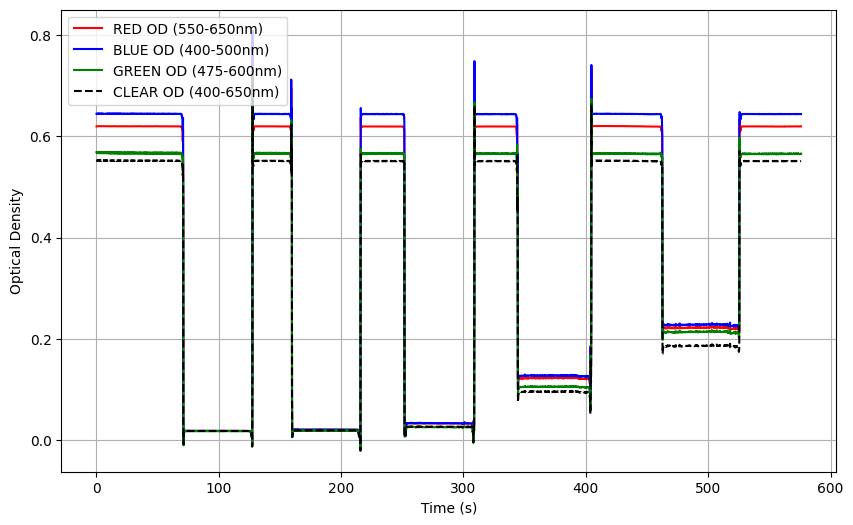

In [45]:
live_plot(intensities_df[10:], cols=['RED OD (550-650nm)', 'BLUE OD (400-500nm)', 'GREEN OD (475-600nm)', 'CLEAR OD (400-650nm)'], y_label='Optical Density', )

In [51]:
sample_0 = [75.74557, 124.6682]
sample_0point005 = [161.0229, 212.7923] # 0.1 / 20
sample_0point05 = [253.3287, 305.8038] # 1 / 20
sample_0point25 = [348.2979, 401.6436] # 5 / 20
sample_0point5 = [463.7007, 524.4743] # 10 / 20

In [75]:
rows = []
for sample_times, sample_name in [
    (sample_0, "Pure Water"),
    (sample_0point005, "0.005 Dilution"),
    (sample_0point05, "0.05 Dilution"),
    (sample_0point25, "0.25 Dilution"),
    (sample_0point5, "0.5 Dilution"),
]:
    sample_results = intensities_df[
        (intensities_df["time"] >= sample_times[0])
        & (intensities_df["time"] <= sample_times[1])
    ].mean()
    sample_results["sample"] = sample_name

    rows.append(sample_results)
results_df = pd.concat(rows, axis = 1)

rows_to_drop = ["red", "blue", "green", "clear", "time", "Unnamed: 0"]

# Drop the specified rows
results_df = results_df.drop(index=rows_to_drop)



In [76]:

new_rows = {
    'Spectrophotometer OD650': [0.0352, 0.0444, 0.0881, 0.3947, 0.7026],
    'Spectrophotometer OD490': [0.0375, 0.0477, 0.0961, 0.4495, 0.8065],
    'Spectrophotometer OD450': [0.0398, 0.0515, 0.1066, 0.5043, 0.9136]
}

for row, values in new_rows.items():
    results_df.loc[row] = values
results_df

,0,1,2,3,4
RED OD (550-650nm),0.018811,0.021092,0.033424,0.122813,0.222056
BLUE OD (400-500nm),0.018817,0.021275,0.034079,0.127629,0.227938
GREEN OD (475-600nm),0.018332,0.019144,0.026269,0.105746,0.213736
CLEAR OD (400-650nm),0.018549,0.019748,0.026881,0.095959,0.186193
sample,Pure Water,0.005 Dilution,0.05 Dilution,0.25 Dilution,0.5 Dilution
Spectrophotometer OD650,0.0352,0.0444,0.0881,0.3947,0.7026
Spectrophotometer OD490,0.0375,0.0477,0.0961,0.4495,0.8065
Spectrophotometer OD450,0.0398,0.0515,0.1066,0.5043,0.9136


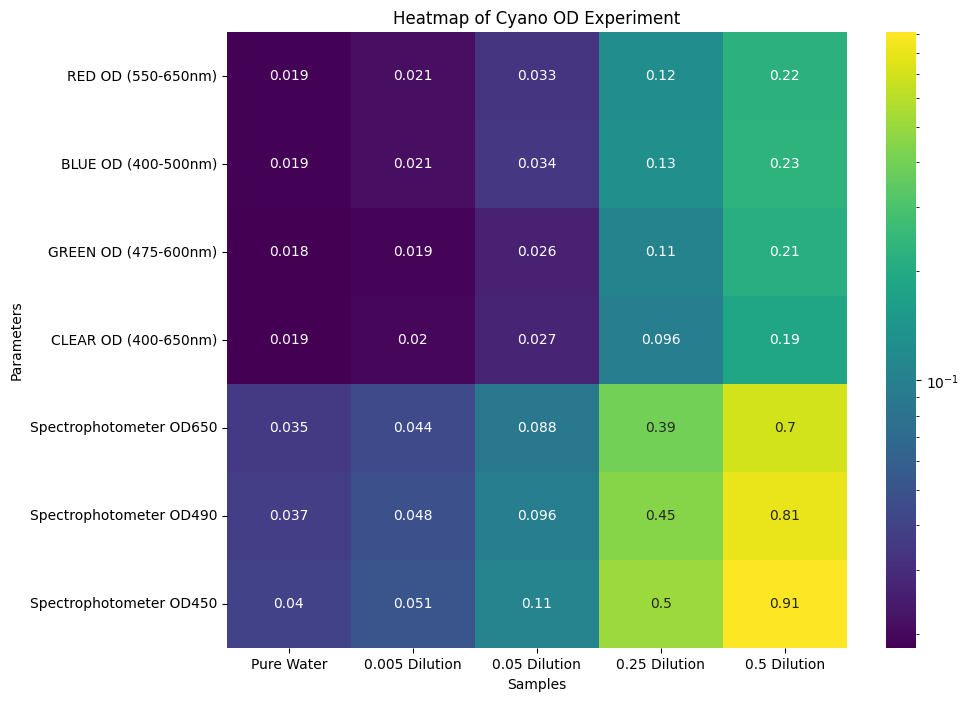

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


# Extract the sample row for x-axis labels
sample_labels = results_df.loc['sample']

# Drop the sample row from the data
data = results_df.drop(index='sample')

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(data.astype(float), annot=True, cmap='viridis', norm=LogNorm(), xticklabels=sample_labels)
plt.title('Heatmap of Cyano OD Experiment')
plt.xlabel('Samples')
plt.ylabel('Parameters')
plt.show()


In [57]:
sample_results = intensities_df[(intensities_df['time'] >= sample_0[0]) & (intensities_df['time'] <= sample_0[1])].mean()
sample_results['sample'] = '0.0 Pure Water'


Unnamed: 0               3823.000000
time                       99.540997
red                     12346.152408
blue                    10264.419123
green                    6583.161035
clear                   25733.489576
RED OD (550-650nm)          0.018811
BLUE OD (400-500nm)         0.018817
GREEN OD (475-600nm)        0.018332
CLEAR OD (400-650nm)        0.018549
dtype: float64

In [60]:
sample_results = intensities_df[(intensities_df['time'] >= sample_0point005[0]) & (intensities_df['time'] <= sample_0point005[1])].mean()
sample_results['sample'] = '0.005 Dilution'


Unnamed: 0                      5971.5
time                        186.121493
red                       12281.468806
blue                      10206.506239
green                      6570.868984
clear                     25662.580214
RED OD (550-650nm)            0.021092
BLUE OD (400-500nm)           0.021275
GREEN OD (475-600nm)          0.019144
CLEAR OD (400-650nm)          0.019748
sample                  0.005 Dilution
dtype: object

In [47]:
live_plot_with_plotly(intensities_df[10:], cols=['RED OD (550-650nm)', 'BLUE OD (400-500nm)', 'GREEN OD (475-600nm)', 'CLEAR OD (400-650nm)'], y_label='Optical Density', )

In [48]:
import pandas as pd

# Load the file
file_path = 'cyano_OD_experiment_1.csv'
data = pd.read_csv(file_path)

# Drop the unnecessary index column
data = data.drop(columns=['Unnamed: 0'])

# Parse the data into a more structured format
# Assuming each replicate is separated by a blank line or some indicator
# This might need to be adjusted based on the exact format of the file

# Split data into replicates based on some condition or known structure
# For now, we'll assume the replicates are continuous blocks of rows
replicate_size = 5 * 8  # 5 columns and 8 rows per replicate
replicates = []

for i in range(0, len(data), replicate_size):
    replicate = data.iloc[i:i + replicate_size].reset_index(drop=True)
    replicates.append(replicate)

# Combine the replicates into a single DataFrame with a multi-level index
multi_index = pd.MultiIndex.from_product([range(len(replicates)), range(replicate_size)], names=['Replicate', 'Index'])
combined_df = pd.concat(replicates, keys=range(len(replicates)))
combined_df.index = multi_index

# Display the structured DataFrame
print(combined_df.head(40))  # Display more rows to see the structure


ValueError: Length mismatch: Expected axis has 12164 elements, new values have 12200 elements

In [ ]:
# Disconnect from brickd
ipcon.disconnect()
